In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Load and preprocess dataset
df = pd.read_csv(r"C:\Users\admin\Desktop\real time app\Bengaluru 2021-01-01 to 2024-02-29.csv")
df['datetime'] = pd.to_datetime(df['datetime'], dayfirst=True)
df.set_index('datetime', inplace=True)
df.sort_index(inplace=True)
df['temp'] = df['temp'].interpolate()

15:08:24 - cmdstanpy - INFO - Chain [1] start processing
15:08:24 - cmdstanpy - INFO - Chain [1] done processing


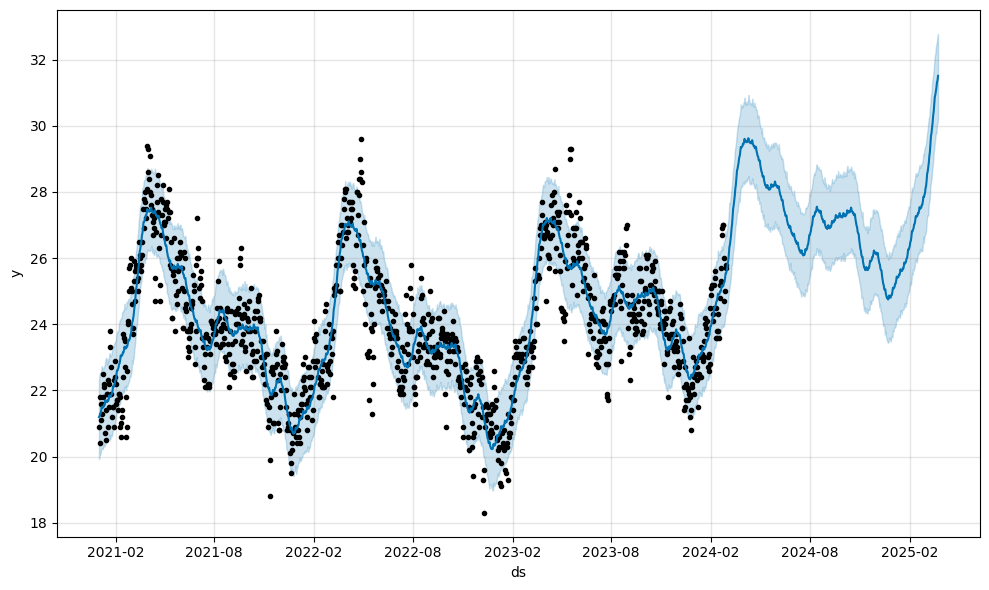

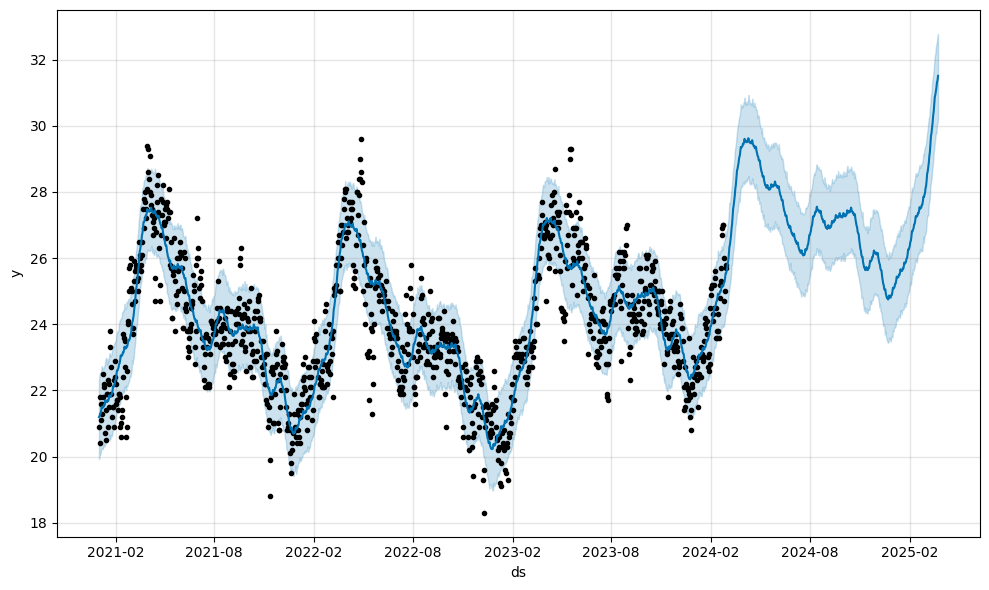

In [5]:
from prophet import Prophet

df_prophet = df.reset_index()[['datetime', 'temp']].rename(columns={'datetime': 'ds', 'temp': 'y'})
model = Prophet()
model.fit(df_prophet)

future = model.make_future_dataframe(periods=390)
forecast = model.predict(future)

model.plot(forecast)